In [184]:
import pandas as pd
import numpy as np
import sklearn

In [185]:
df=pd.read_csv('Counties_symp_death_policy.csv')

In [186]:
df.head()

,date,state_code_x,fips,gender,age_bucket,n,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,...,is_otherbusinessclose,is_publicmask,is_quarantine,is_restaurantrestrict,is_schoolclose,is_schoolhealthsafety,is_stayathome,is_travelrestrictentry,is_travelrestrictexit,is_travelrestrictintra
0,2020-04-13,al,1003,overall,overall,60,1.6667,1.6667,1.6667,1.6667,...,1,0,0,1,1,0,1,0,0,0
1,2020-04-14,al,1003,overall,overall,68,0.0000,0.0000,0.0000,1.4925,...,1,0,0,1,1,0,1,0,0,0
2,2020-04-15,al,1003,female,overall,51,0.0000,0.0000,1.9608,0.0000,...,1,0,0,1,1,0,1,0,0,0
3,2020-04-15,al,1003,overall,overall,64,0.0000,0.0000,3.1746,0.0000,...,1,0,0,1,1,0,1,0,0,0
4,2020-04-16,al,1003,overall,overall,61,3.2787,3.2787,3.2787,3.2787,...,1,0,0,1,1,0,1,0,0,0


In [187]:
list(df.columns)

['date',
 'state_code_x',
 'fips',
 'gender',
 'age_bucket',
 'n',
 'pct_cli',
 'pct_ili',
 'pct_cli_anosmia_ageusia',
 'pct_hh_cli',
 'pct_cmnty_cli',
 'pct_hh_fever',
 'pct_hh_sore_throat',
 'pct_hh_cough',
 'pct_hh_shortness_of_breath',
 'pct_hh_difficulty_breathing',
 'mean_hh_cli_ct',
 'mean_cmnty_cli_ct',
 'pct_self_fever',
 'pct_self_cough',
 'pct_self_shortness_of_breath',
 'pct_self_difficulty_breathing',
 'pct_self_tiredness_or_exhaustion',
 'pct_self_nasal_congestion',
 'pct_self_runny_nose',
 'pct_self_muscle_joint_aches',
 'pct_self_sore_throat',
 'pct_self_persistent_pain_pressure_in_chest',
 'pct_self_nausea_vomiting',
 'pct_self_diarrhea',
 'pct_self_anosmia_ageusia',
 'pct_self_other',
 'pct_self_none_of_above',
 'pct_self_multiple_symptoms',
 'pct_tested_and_positive',
 'pct_tested_and_negative',
 'pct_tested_no_result',
 'pct_could_not_get_tested',
 'pct_did_not_try_to_get_tested',
 'pct_worked_outside_home',
 'pct_avoid_contact_all_or_most_time',
 'mean_outside_hh_c

In [188]:
df1=df[[
 'date',
 'state_code_x',
 'fips',
 'n',
 'pct_self_fever',
 'pct_self_cough',
 'pct_self_shortness_of_breath',
 'pct_self_difficulty_breathing',
 'pct_self_tiredness_or_exhaustion',
 'pct_self_nasal_congestion',
 'pct_self_runny_nose',
 'pct_self_muscle_joint_aches',
 'pct_self_sore_throat',
 'pct_self_persistent_pain_pressure_in_chest',
 'pct_self_nausea_vomiting',
 'pct_self_diarrhea',
 'pct_self_anosmia_ageusia',
 'DeathRate1000'
]]

In [189]:
df1.head()

,date,state_code_x,fips,n,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,DeathRate1000
0,2020-04-13,al,1003,60,1.6667,13.3333,6.6667,3.3333,16.6667,16.6667,8.3333,10.0000,10.0000,5.0000,6.6667,8.3333,0.0000,0.004480
1,2020-04-14,al,1003,68,0.0000,22.3881,2.9851,1.4925,14.9254,19.4030,14.9254,11.9403,10.4478,2.9851,1.4925,8.9552,0.0000,0.008959
2,2020-04-15,al,1003,51,0.0000,15.6863,0.0000,1.9608,17.6471,13.7255,15.6863,11.7647,11.7647,3.9216,1.9608,7.8431,1.9608,0.008959
3,2020-04-15,al,1003,64,0.0000,12.6984,0.0000,1.5873,15.8730,11.1111,12.6984,11.1111,9.5238,3.1746,1.5873,6.3492,3.1746,0.008959
4,2020-04-16,al,1003,61,3.2787,13.1148,3.2787,4.9180,16.3934,21.3115,16.3934,14.7541,9.8361,4.9180,6.5574,9.8361,1.6393,0.008959


In [190]:
df1.describe()

,fips,n,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,DeathRate1000
count,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000
mean,27713.157161,106.723418,0.704248,9.314610,3.605698,1.917967,14.395384,13.529465,10.643838,10.931766,5.276073,1.688670,2.622828,5.782572,1.187029,0.357237
std,15861.206802,77.505564,0.987737,4.049779,2.289666,1.620357,4.963990,4.719435,4.587291,3.883955,2.902320,1.534989,2.018514,2.871218,1.341350,0.509075
min,1003.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12086.000000,62.000000,0.000000,6.451600,1.910800,0.793700,10.967700,10.185200,7.407400,8.235300,3.278700,0.000000,1.282100,3.773600,0.000000,0.055245
50%,27053.000000,83.000000,0.000000,8.928600,3.370800,1.694900,14.062500,13.223100,10.091700,10.666700,5.000000,1.515200,2.247200,5.555600,1.000000,0.155550
75%,42003.000000,121.000000,1.271200,11.764700,4.938300,2.816900,17.475700,16.455700,13.432800,13.333300,6.956500,2.475200,3.738300,7.476600,1.818200,0.415886
max,56025.000000,1080.000000,10.256400,32.692300,18.000000,15.384600,40.384600,46.031700,38.888900,35.294100,27.868900,13.725500,20.000000,25.714300,16.326500,3.449426


In [192]:
df2=df1.groupby(['date','state_code_x','fips']).mean()
df2=df2.sort_values(by=['state_code_x','fips','date'])
df2=df2.reset_index()
df2.head()

,date,state_code_x,fips,n,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,DeathRate1000
0,2020-04-13,ak,2020,97.0,1.51785,19.03775,3.0357,3.4782,18.53370,15.11705,22.01185,8.22225,9.48810,2.59325,2.59325,7.33725,2.15075,0.013889
1,2020-04-14,ak,2020,85.0,2.44895,8.67350,1.7347,1.2245,16.93875,13.06120,13.06120,6.63265,7.85715,1.22450,2.44895,7.14290,0.00000,0.013889
2,2020-04-15,ak,2020,55.0,0.00000,10.90910,1.8182,1.8182,9.09090,16.36360,20.00000,5.45450,5.45450,0.00000,1.81820,5.45450,0.00000,0.013889
3,2020-04-16,ak,2020,58.0,0.00000,10.34480,3.4483,1.7241,17.24140,18.96550,20.68970,15.51720,8.62070,1.72410,3.44830,10.34480,0.00000,0.013889
4,2020-04-20,ak,2020,51.0,0.00000,10.20410,4.0816,0.0000,18.36730,16.32650,10.20410,14.28570,4.08160,6.12240,8.16330,4.08160,0.00000,0.013889


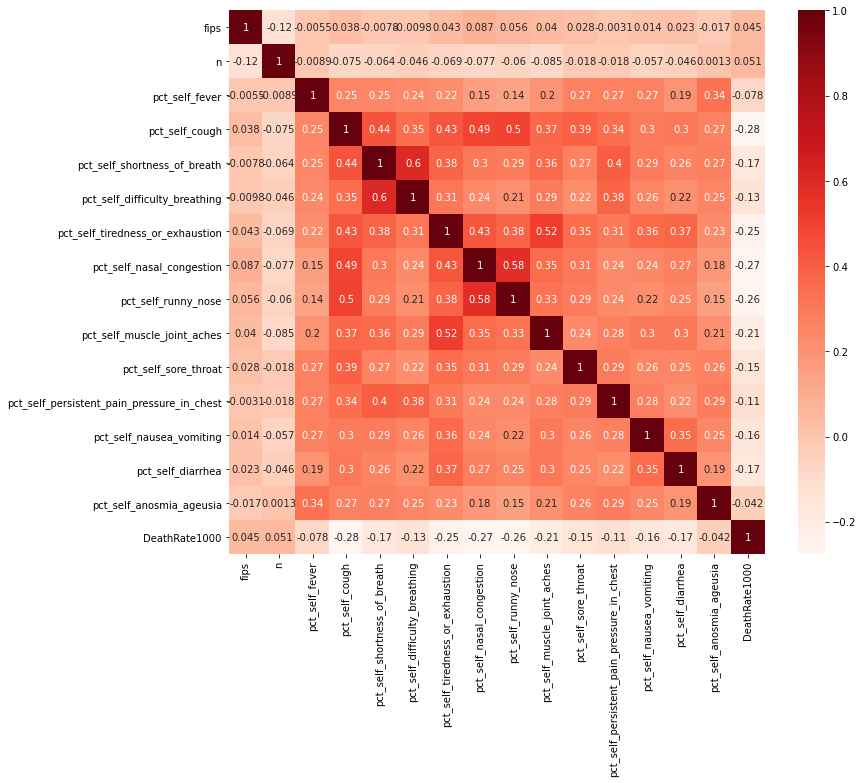

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df2.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [194]:
max_lag=40
symptoms=[
 'pct_self_fever',
 'pct_self_cough',
 'pct_self_shortness_of_breath',
 'pct_self_difficulty_breathing',
 'pct_self_tiredness_or_exhaustion',
 'pct_self_nasal_congestion',
 'pct_self_runny_nose',
 'pct_self_muscle_joint_aches',
 'pct_self_sore_throat',
 'pct_self_persistent_pain_pressure_in_chest',
 'pct_self_nausea_vomiting',
 'pct_self_diarrhea',
 'pct_self_anosmia_ageusia',
    
 'DeathRate1000']
lagged_correlation = pd.DataFrame.from_dict(
    {x: [df2['DeathRate1000'].corr(df2[x].shift(-t)) for t in range(max_lag)] for x in symptoms})

In [195]:
lagged_correlation.head(20)

,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,DeathRate1000
0,-0.077893,-0.275825,-0.173285,-0.133507,-0.254829,-0.274059,-0.264185,-0.205302,-0.147332,-0.113151,-0.155717,-0.166426,-0.042151,1.000000
1,-0.076067,-0.266644,-0.170508,-0.131993,-0.251735,-0.267628,-0.256696,-0.204905,-0.141320,-0.109378,-0.153478,-0.164157,-0.043188,0.990996
2,-0.074767,-0.260281,-0.168610,-0.131009,-0.248893,-0.263292,-0.250602,-0.203220,-0.138504,-0.105791,-0.152665,-0.161626,-0.044303,0.982481
3,-0.073084,-0.253948,-0.167166,-0.130062,-0.246962,-0.259552,-0.244635,-0.201895,-0.134397,-0.103273,-0.150307,-0.159735,-0.044887,0.974256
4,-0.072060,-0.246414,-0.164143,-0.128836,-0.243661,-0.253810,-0.236884,-0.199371,-0.130402,-0.101321,-0.148461,-0.159028,-0.044549,0.966199
5,-0.070259,-0.241746,-0.162236,-0.127563,-0.242266,-0.250552,-0.230693,-0.198628,-0.127204,-0.098621,-0.147829,-0.156933,-0.045777,0.958259
6,-0.068545,-0.235480,-0.158995,-0.125559,-0.239704,-0.246046,-0.224863,-0.196906,-0.123416,-0.095710,-0.145526,-0.154112,-0.045160,0.950436
7,-0.067675,-0.229882,-0.156027,-0.124343,-0.238382,-0.241571,-0.218756,-0.194978,-0.120121,-0.093313,-0.144367,-0.152637,-0.045372,0.942883
8,-0.065291,-0.224011,-0.153384,-0.123698,-0.235663,-0.236403,-0.212875,-0.192341,-0.117543,-0.092659,-0.142692,-0.151593,-0.046104,0.935360
9,-0.064422,-0.219346,-0.150162,-0.122677,-0.233631,-0.231937,-0.207239,-0.189954,-0.115493,-0.091493,-0.141965,-0.149208,-0.047136,0.927905


In [196]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
s = lagged_correlation.style.background_gradient(cmap=cm)
s

,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,DeathRate1000
0,-0.077893,-0.275825,-0.173285,-0.133507,-0.254829,-0.274059,-0.264185,-0.205302,-0.147332,-0.113151,-0.155717,-0.166426,-0.042151,1.000000
1,-0.076067,-0.266644,-0.170508,-0.131993,-0.251735,-0.267628,-0.256696,-0.204905,-0.141320,-0.109378,-0.153478,-0.164157,-0.043188,0.990996
2,-0.074767,-0.260281,-0.168610,-0.131009,-0.248893,-0.263292,-0.250602,-0.203220,-0.138504,-0.105791,-0.152665,-0.161626,-0.044303,0.982481
3,-0.073084,-0.253948,-0.167166,-0.130062,-0.246962,-0.259552,-0.244635,-0.201895,-0.134397,-0.103273,-0.150307,-0.159735,-0.044887,0.974256
4,-0.072060,-0.246414,-0.164143,-0.128836,-0.243661,-0.253810,-0.236884,-0.199371,-0.130402,-0.101321,-0.148461,-0.159028,-0.044549,0.966199
5,-0.070259,-0.241746,-0.162236,-0.127563,-0.242266,-0.250552,-0.230693,-0.198628,-0.127204,-0.098621,-0.147829,-0.156933,-0.045777,0.958259
6,-0.068545,-0.235480,-0.158995,-0.125559,-0.239704,-0.246046,-0.224863,-0.196906,-0.123416,-0.095710,-0.145526,-0.154112,-0.045160,0.950436
7,-0.067675,-0.229882,-0.156027,-0.124343,-0.238382,-0.241571,-0.218756,-0.194978,-0.120121,-0.093313,-0.144367,-0.152637,-0.045372,0.942883
8,-0.065291,-0.224011,-0.153384,-0.123698,-0.235663,-0.236403,-0.212875,-0.192341,-0.117543,-0.092659,-0.142692,-0.151593,-0.046104,0.935360
9,-0.064422,-0.219346,-0.150162,-0.122677,-0.233631,-0.231937,-0.207239,-0.189954,-0.115493,-0.091493,-0.141965,-0.149208,-0.047136,0.927905


In [215]:
df2.head(20)

,date,state_code_x,fips,n,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,DeathRate1000
0,2020-04-13,ak,2020,97.0,1.51785,19.03775,3.03570,3.47820,18.53370,15.11705,22.01185,8.22225,9.48810,2.59325,2.59325,7.33725,2.15075,0.013889
1,2020-04-14,ak,2020,85.0,2.44895,8.67350,1.73470,1.22450,16.93875,13.06120,13.06120,6.63265,7.85715,1.22450,2.44895,7.14290,0.00000,0.013889
2,2020-04-15,ak,2020,55.0,0.00000,10.90910,1.81820,1.81820,9.09090,16.36360,20.00000,5.45450,5.45450,0.00000,1.81820,5.45450,0.00000,0.013889
3,2020-04-16,ak,2020,58.0,0.00000,10.34480,3.44830,1.72410,17.24140,18.96550,20.68970,15.51720,8.62070,1.72410,3.44830,10.34480,0.00000,0.013889
4,2020-04-20,ak,2020,51.0,0.00000,10.20410,4.08160,0.00000,18.36730,16.32650,10.20410,14.28570,4.08160,6.12240,8.16330,4.08160,0.00000,0.013889
5,2020-04-22,ak,2020,56.0,0.00000,7.14290,1.78570,1.78570,14.28570,12.50000,17.85710,7.14290,1.78570,0.00000,1.78570,7.14290,0.00000,0.013889
6,2020-04-23,ak,2020,53.0,0.00000,9.61540,1.92310,0.00000,13.46150,11.53850,11.53850,13.46150,0.00000,1.92310,5.76920,7.69230,1.92310,0.013889
7,2020-04-24,ak,2020,79.0,0.00000,10.25640,2.56410,2.56410,19.23080,8.97440,15.38460,16.66670,3.84620,2.56410,0.00000,3.84620,1.28210,0.013889
8,2020-04-25,ak,2020,69.0,0.00000,8.73260,1.50260,0.00000,10.23520,16.24560,9.62545,7.83975,4.83450,0.00000,0.00000,9.62545,0.00000,0.013889
9,2020-04-26,ak,2020,69.0,0.00000,16.52875,6.62025,3.00520,19.25090,9.62545,18.03135,19.53400,7.51310,1.50260,3.00520,3.61495,0.00000,0.013889
